Exploración de datos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None


In [3]:
df = pd.read_csv('Covid Data.csv')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

Ahora creo la columna que indica si el paciente ha fallecido o no. Se le asigna 
valor 1 a los pacientes fallecidos y 2 al resto de pacientes. 
De los que se carece datos ('97', '99') se ha supuesto que han sobrevivido

In [5]:
df["high_risk"] = np.where(df["DATE_DIED"] == "9999-99-99", 2, 1)
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,high_risk
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97,1



Se eliminan las columnas que no aportan información válida para el análisis. 
También se eliminan los pacientes que no tienen covid o de los que su prueba ha sido inconclusa.

In [6]:
df.drop(columns=['MEDICAL_UNIT', 'DATE_DIED', 'PATIENT_TYPE'], inplace=True)
df = df.loc[df["CLASIFFICATION_FINAL"] < 4]
df.head()


,USMER,SEX,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,high_risk
0,2,1,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97,1
2,2,2,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2,1
4,2,2,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97,1
5,2,1,2,1,40,2,2,2,2,2,2,2,2,2,2,2,3,2,2
6,2,1,97,2,64,2,2,2,2,2,2,2,2,2,2,2,3,97,2


Se buscan valores nulos: No existen valores nulos

In [7]:
df_bool = pd.isnull(df)
print(df_bool)

         USMER    SEX  INTUBED  PNEUMONIA    AGE  PREGNANT  DIABETES   COPD  \
0        False  False    False      False  False     False     False  False   
2        False  False    False      False  False     False     False  False   
4        False  False    False      False  False     False     False  False   
5        False  False    False      False  False     False     False  False   
6        False  False    False      False  False     False     False  False   
...        ...    ...      ...        ...    ...       ...       ...    ...   
1047933  False  False    False      False  False     False     False  False   
1047934  False  False    False      False  False     False     False  False   
1047935  False  False    False      False  False     False     False  False   
1047936  False  False    False      False  False     False     False  False   
1047937  False  False    False      False  False     False     False  False   

         ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEA

Pero sí existen missing values ('97' y '99') que, debido al gran número de pacientes, serán eliminados si se encuentran.
Si el valor de 'PREGNANT' = 97, 98 y 99 para 'SEX' = 2 se determina que 'PREGNANT'= 2. Un hombre cis no se puede quedar embarazado. Debido al bajo porcentaje de personas trans en México se decide que todas son hombres cis.

In [8]:
df = df.replace({99: np.nan, 97: np.nan, 98: np.nan})
df.loc[(df["SEX"] == 2) & (df["PREGNANT"].isnull()), "PREGNANT"] = 2
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108090 entries, 2 to 1047933
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 108090 non-null  int64  
 1   SEX                   108090 non-null  int64  
 2   INTUBED               108090 non-null  float64
 3   PNEUMONIA             108090 non-null  float64
 4   AGE                   108090 non-null  float64
 5   PREGNANT              108090 non-null  float64
 6   DIABETES              108090 non-null  float64
 7   COPD                  108090 non-null  float64
 8   ASTHMA                108090 non-null  float64
 9   INMSUPR               108090 non-null  float64
 10  HIPERTENSION          108090 non-null  float64
 11  OTHER_DISEASE         108090 non-null  float64
 12  CARDIOVASCULAR        108090 non-null  float64
 13  OBESITY               108090 non-null  float64
 14  RENAL_CHRONIC         108090 non-null  float64
 15 

In [9]:
df.head()

,USMER,SEX,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,high_risk
2,2,2,1.0,2.0,55.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
5,2,1,2.0,1.0,40.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,2
8,2,1,2.0,2.0,37.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,3,2.0,2
9,2,1,2.0,2.0,25.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,2
11,2,2,2.0,2.0,24.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,2


Se observa que el número de pacientes disminuye dramáticamente. Esto hace que el desbalanceo de clase que ocurría antes sea menor.

Desbalanceo de clases:

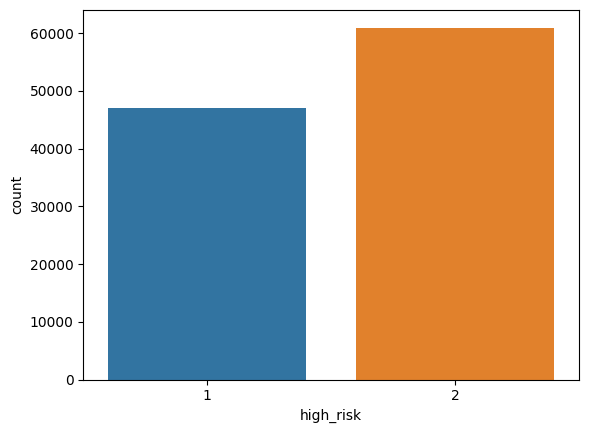

In [10]:
sns.countplot(x='high_risk', data=df)
plt.show()

In [11]:
df['high_risk'].value_counts()

2    60974
1    47116
Name: high_risk, dtype: int64

Se observa un ligero desbalanceo de clases

Debido al gran número de datos pensé en utilizar un subset, pero luego al filtrar vi que no eran tantos.

In [12]:
subset = df.sample(10000)

Exploración de las variables:

Selección de atributos:

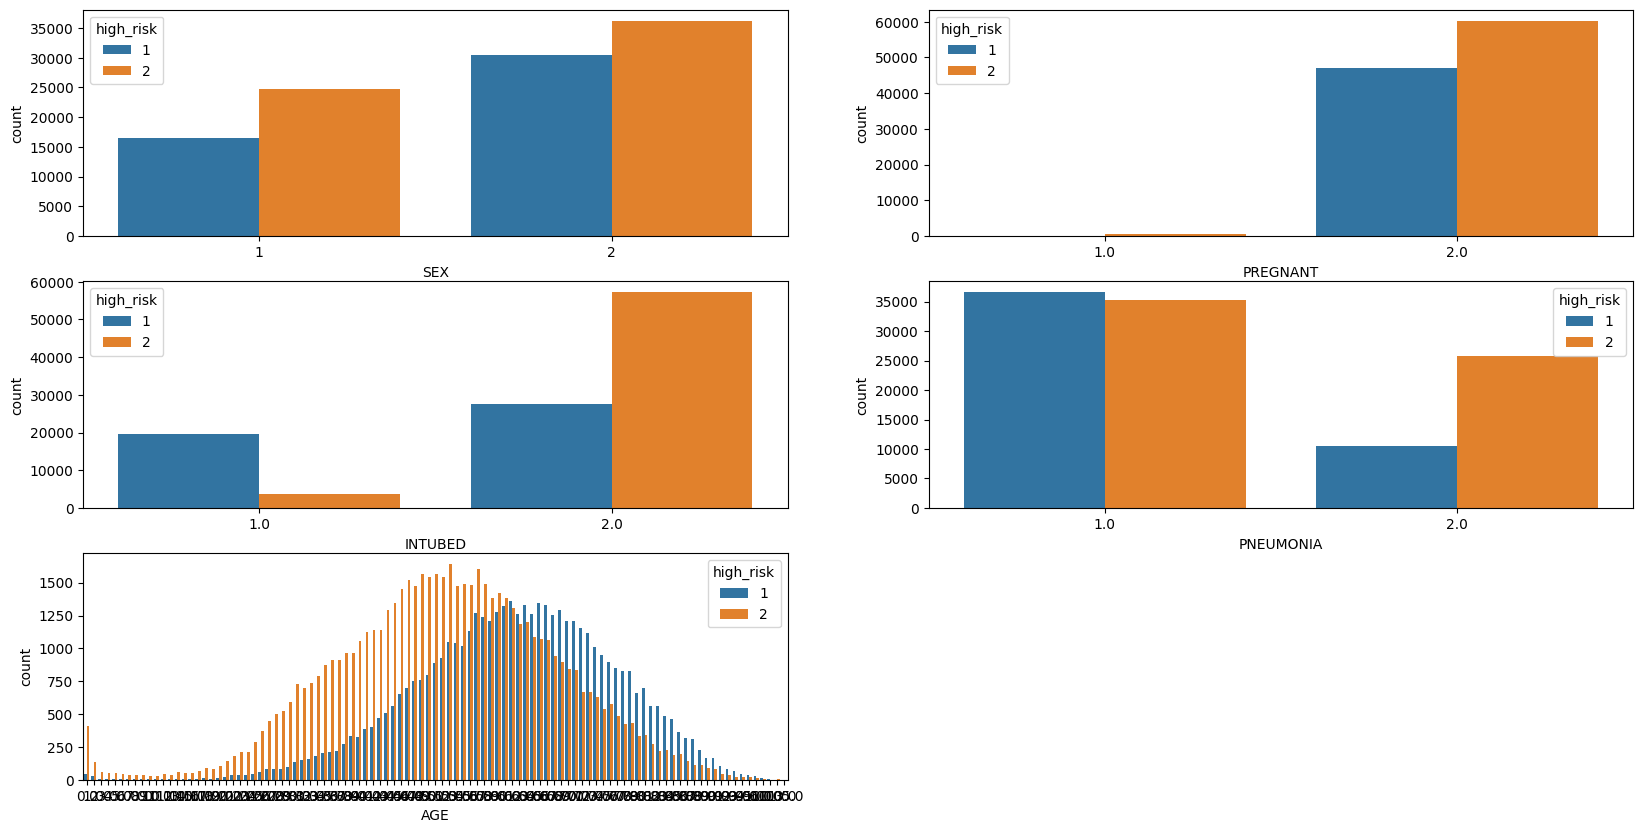

In [13]:
plt.figure(figsize=(20, 10))
columns = ['SEX', 'PREGNANT', 'INTUBED', 'PNEUMONIA', 'AGE']
ncols = 2

nrows = int(np.ceil(len(columns) / 2))

for i, col in enumerate(columns):
  plt.subplot(nrows, ncols, i+1)
  sns.countplot(data=df, x=col, hue="high_risk")  

De estos plots se extrae que:
1. Menos mujeres han contraido COVID. El porcentaje de hombres fallecido es ligeramente mayor que el de mujeres.
2. No se aprecia bien.
3. Fallecen más personas intubadas que no intubadas. Esto es debido al deterioro provocado por la enfermedad. No significa que la intubación cause la muerte de los pacientes.
4. Si el paciente llega a desarrollar pneumonía durante la enfermedad es más probable que fallezca. La pneumonía se desarrolla en casos graves y avanzados de la enfermedad.
5. El pico en la edad de personas que no fallecieron al padecer el covid ocurre antes que el de sujetos que sí fallecieron. Esto sugiere que los pacientes de edades más avanzadas tienen un riesgo mayor.

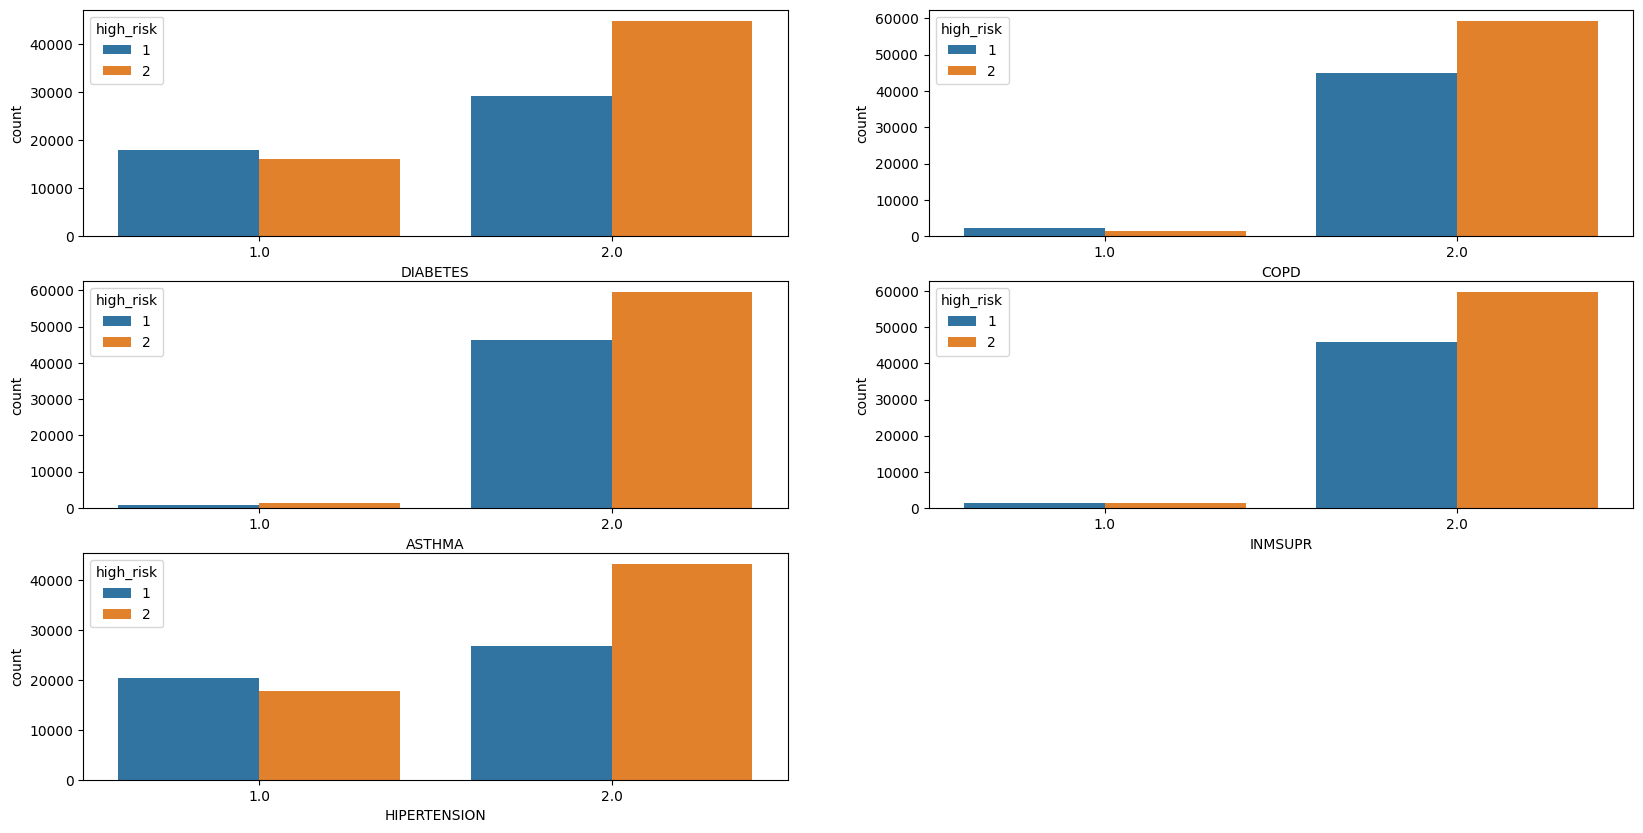

In [14]:
plt.figure(figsize=(20, 10))
columns = ['DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION']
ncols = 2

nrows = int(np.ceil(len(columns) / 2))

for i, col in enumerate(columns):
  plt.subplot(nrows, ncols, i+1)
  sns.countplot(data=df, x=col, hue="high_risk")  

6. El riesgo de fallecer de COVID es mayor si se acompaña con diabetes, alcanza un 50%.
7. Más personas que padecen Enfermedad Pulmonar Obstructiva Crónica y contraen covid fallecen que sobreviven.
8. Existe un registro bajo de pacientes con asma que hayan padecido covid, sin embargo parece que la figura muestra que el riesgo de padecer de covid con y sin asma es similar.
9. Si el paciente es inmunodeprimido tiene una probabilidad ligeramente mayor de padecer COVID que si no la tuviese.
10. Los pacientes con hipertensión tienen aproximadamente un 50% de posibilidades de fallecer si contraen COVID.

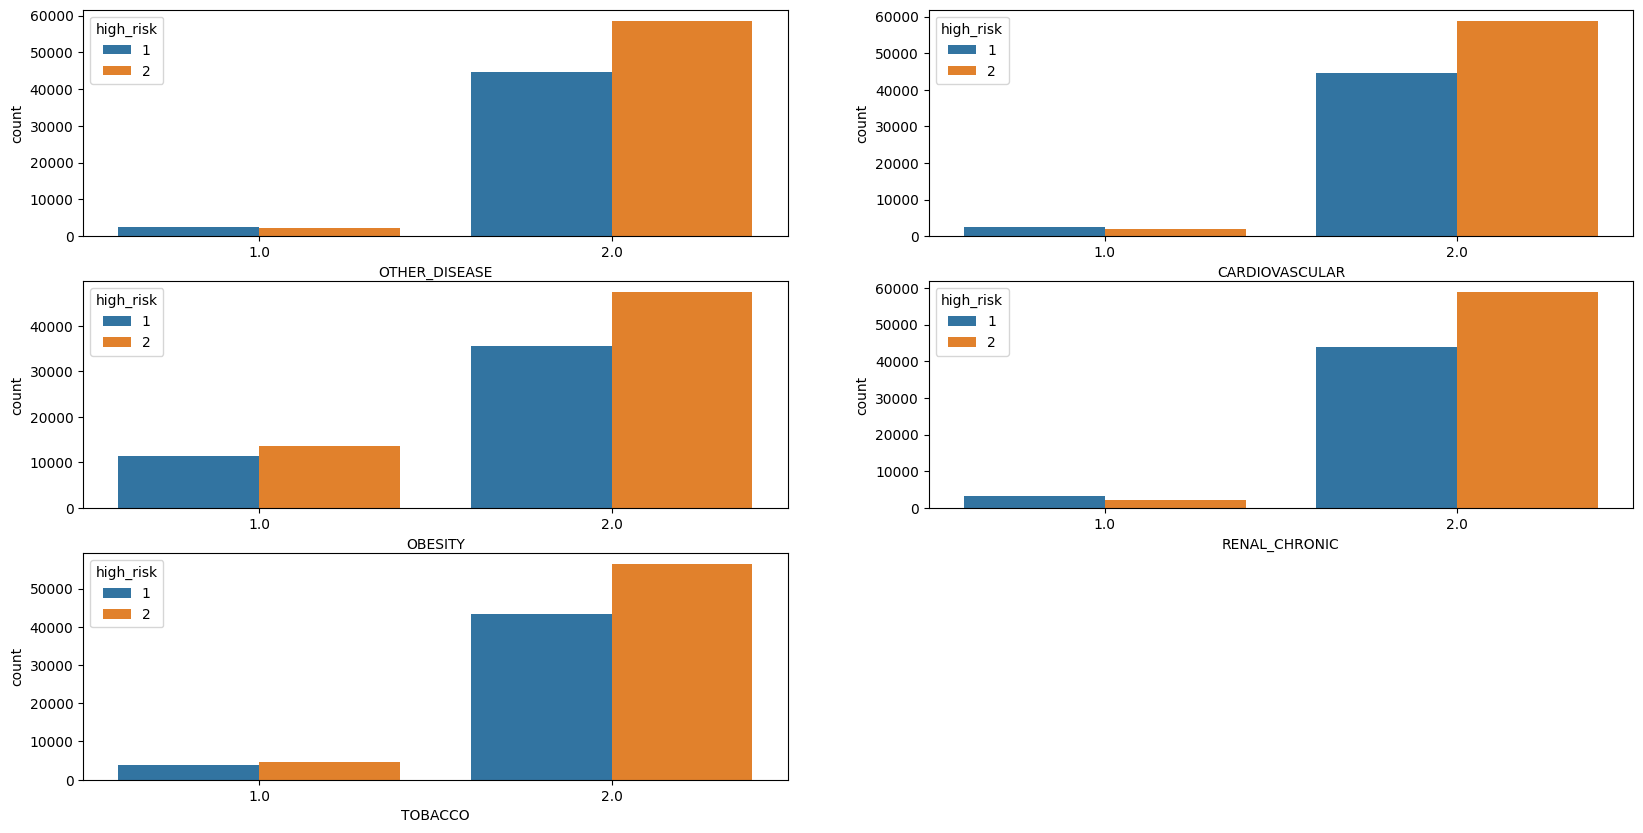

In [15]:
plt.figure(figsize=(20, 10))
columns = ['OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']
ncols = 2

nrows = int(np.ceil(len(columns) / 2))

for i, col in enumerate(columns):
  plt.subplot(nrows, ncols, i+1)
  sns.countplot(data=df, x=col, hue="high_risk")  

11. Todas las enfermedad y el consumo de tabaco aumentan la probabilidad del paciente de fallecer de COVID


Las enfermedades expuestas anteriormente no son exclusivas, un paciente puede padecer varias enfermedades a la vez y con esto su riesgo de fallecer aumentaría.

A continuación se estudiará la relación que existe entre las enfermedades.

<AxesSubplot: >

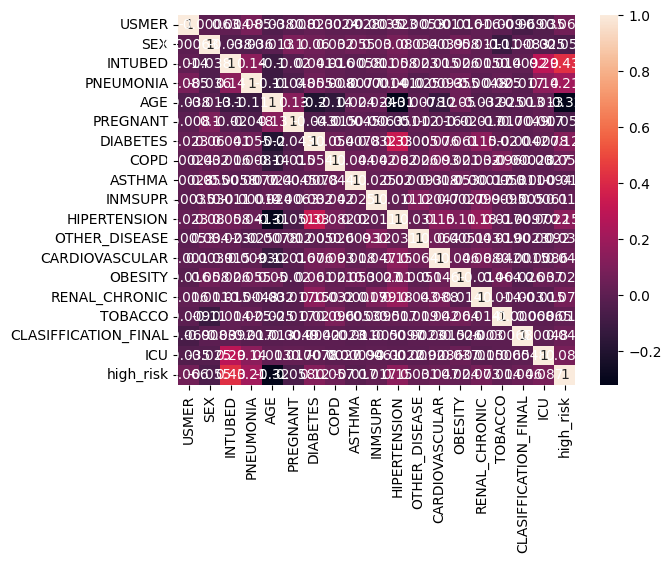

In [16]:
sns.heatmap(df.corr(), annot=True)

Parece que las columnas con más correlación con 'high_risk' son 'INTUBED', 'PNEUMONIA'. El que el paciente se encuentre intubado y tenga pneumonía indica que el paciente llegó a fases muy avanzadas y graves de la enfermedad.
Respecto a las otras columnas, parece que se encuentra ligeramente correlacionado con 'DIABETES', 'HIPERTENSION' y 'RENAL_CHRONIC'.

De este mapa obtenemos también otras relaciones entre las enfermedades:
1. La hipertensión y la diabetes suelen aparecer juntas.

A continuación se muestra la probabilidad de un paciente de fallecer si padece cualquiera de las enferdades listadas salvo pneumonía y tabaquismo.

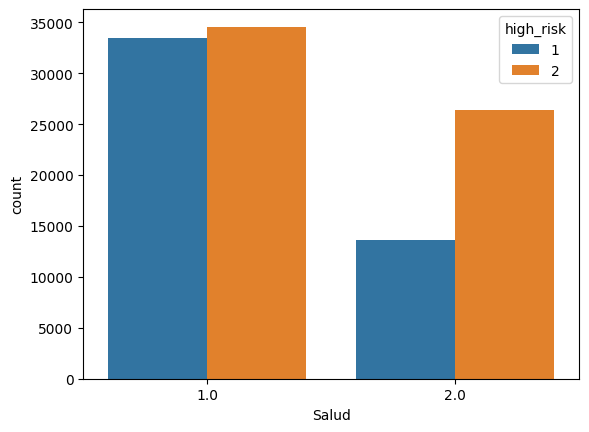

In [17]:
# Recorremos las filas del dataset
for index, row in df.iterrows():
  # Si encontramos algún valor diferente de 2 en alguna de las columnas mencionadas
  if (row['DIABETES'] != 2) or (row['COPD'] != 2) or (row['ASTHMA'] != 2) or (row['INMSUPR'] != 2) or (row['HIPERTENSION'] != 2) or (row['OTHER_DISEASE'] != 2) or (row['CARDIOVASCULAR'] != 2) or (row['OBESITY'] != 2) or (row['RENAL_CHRONIC'] != 2):
    # Marcamos el paciente como 'Enfermo'
    df.at[index, 'Salud'] = 1
  # Si todas las columnas tienen el valor 2
  else:
    # Marcamos el paciente como 'Sano'
    df.at[index, 'Salud'] = 2

# Creamos un gráfico de barras con la cantidad de pacientes sanos y enfermos
sns.countplot(x='Salud', data=df, hue='high_risk')

# Mostramos el gráfico
plt.show()

De este plot se saca que la probabilidad de sobrevivir al covid es mucho mayor si estás completamente sano.
También se ve que los pacientes contagiados de covid suelen tener de antemano alguna patología.

In [18]:
# Eliminamos la columna 'Salud' del dataset
df = df.drop(columns=['Salud'])

Entrenando modelo
Se ha elegido el modelo de aprendizaje supervisado por clasificación ya que:
1. Estos datos están formados por un vector de valores (variables) y un atributo de clase
2. La función inferida debe ser capaz de predecir la clase a partir de los valores observados
3. Debe ser capaz de generalizar con instancias no vistas
4. El algoritmo encuentra diferentes patrones y tiene por objetivo clasificar los elementos en diferentes grupos.

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

def show_metrics(clf, y_test, y_pred):
    print(f'Accuracy score: {int(accuracy_score(y_test, y_pred)*100)}%\n')
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=clf.classes_)
    disp.plot()
    plt.show()

Separa el dataset de entrenamiento en train y test

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop("high_risk", axis=1).values
y = df["high_risk"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aquí almacenaremos el rendimiento de cada algoritmo para su posterior comparación
algorithm_accuracy = []

Regresión logística

Accuracy score: 73%

              precision    recall  f1-score   support

           1       0.75      0.60      0.67      9416
           2       0.73      0.84      0.79     12202

    accuracy                           0.74     21618
   macro avg       0.74      0.72      0.73     21618
weighted avg       0.74      0.74      0.73     21618



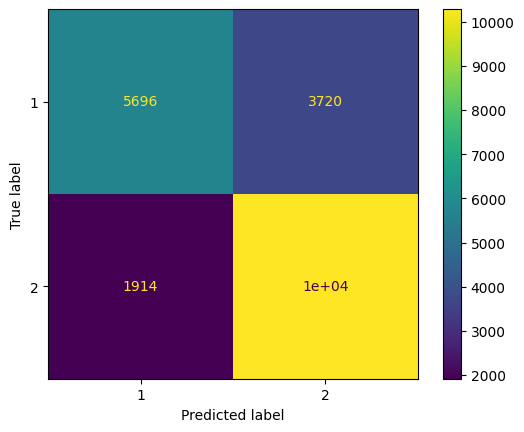

In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='newton-cg', multi_class='auto')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

show_metrics(logreg, y_test, y_pred)
algorithm_accuracy.append((logreg, accuracy_score(y_test, y_pred)))

Arriba utilicé Newton-cg, pero voy a comprobar cuál es el mejor método

In [22]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'solver': ['newton-cg', 'liblinear', 'sag', 'saga'],
    'multi_class': ['auto', 'warn']
}

# Create a based model
rf = LogisticRegression()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
print(f'Best params: {grid_search.best_params_}')

best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score:  \n {accuracy}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

algorithm_accuracy.append((grid_search.best_estimator_, accuracy))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END .................multi_class=auto, solver=newton-cg; total time=   1.6s
[CV] END .................multi_class=warn, solver=newton-cg; total time=   0.0s
[CV] END .................multi_class=warn, solver=newton-cg; total time=   0.0s
[CV] END .................multi_class=warn, solver=newton-cg; total time=   0.0s
[CV] END .................multi_class=warn, solver=liblinear; total time=   0.0s
[CV] END .................multi_class=warn, solver=liblinear; total time=   0.0s
[CV] END .................multi_class=warn, solver=liblinear; total time=   0.0s
[CV] END .......................multi_class=warn, solver=sag; total time=   0.0s
[CV] END .......................multi_class=warn, solver=sag; total time=   0.0s
[CV] END .......................multi_class=warn, solver=sag; total time=   0.0s
[CV] END ......................multi_class=warn, solver=saga; total time=   0.0s
[CV] END ......................multi_class=warn, 

/home/ines/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ines/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ines/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................multi_class=auto, solver=sag; total time=   3.6s
[CV] END .......................multi_class=auto, solver=sag; total time=   3.7s
[CV] END .......................multi_class=auto, solver=sag; total time=   3.7s


/home/ines/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ines/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ines/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ines/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
---------------

[CV] END ......................multi_class=auto, solver=saga; total time=   3.8s
[CV] END ......................multi_class=auto, solver=saga; total time=   3.8s
[CV] END ......................multi_class=auto, solver=saga; total time=   3.8s
Best params: {'multi_class': 'auto', 'solver': 'sag'}
Accuracy score:  
 0.7395688777870293
Confusion matrix: 
 [[ 5686  3730]
 [ 1900 10302]]


/home/ines/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/home/ines/eoi/09-data-science/.venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy score: 73%

              precision    recall  f1-score   support

           1       0.75      0.60      0.67      9416
           2       0.73      0.84      0.79     12202

    accuracy                           0.74     21618
   macro avg       0.74      0.72      0.73     21618
weighted avg       0.74      0.74      0.73     21618



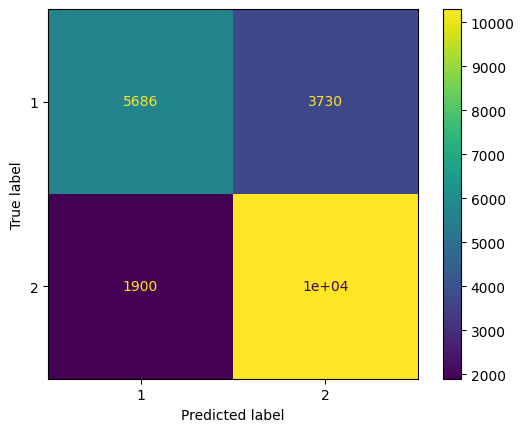

In [23]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='sag', multi_class='auto')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

show_metrics(logreg, y_test, y_pred)
algorithm_accuracy.append((logreg, accuracy_score(y_test, y_pred)))

Naive Bayes
Naive Bayes considera los siguientes puntos:
Hipótesis de independencia condicional: los hallazgos son condicionalmente independientes entre sí para el diagnosticar 'high_risk'.
No pueden ocurrir dos enfermedades a la vez. Que el paciente no padezca ninguna enfermedad hace que exista un nuevo nodo.

No parece una buena aproximación ya que no se asemeja a las condiciones dadas en el mundo real.

Accuracy score: 69%

              precision    recall  f1-score   support

           1       0.66      0.63      0.64      9416
           2       0.72      0.75      0.74     12202

    accuracy                           0.70     21618
   macro avg       0.69      0.69      0.69     21618
weighted avg       0.70      0.70      0.70     21618



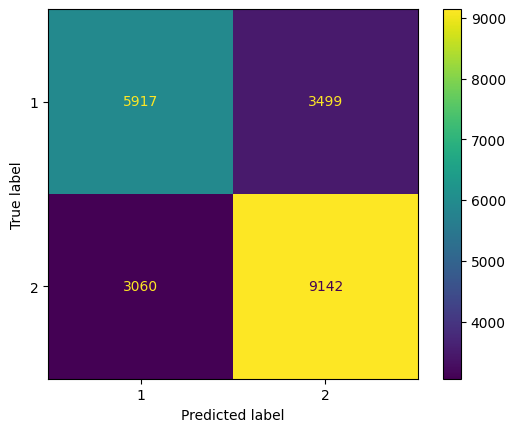

In [24]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  

y_pred = gaussian.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
show_metrics(gaussian, y_test, y_pred)


Decision Tree

Accuracy score: 70%

              precision    recall  f1-score   support

           1       0.68      0.62      0.65      9416
           2       0.73      0.77      0.75     12202

    accuracy                           0.71     21618
   macro avg       0.70      0.70      0.70     21618
weighted avg       0.70      0.71      0.70     21618



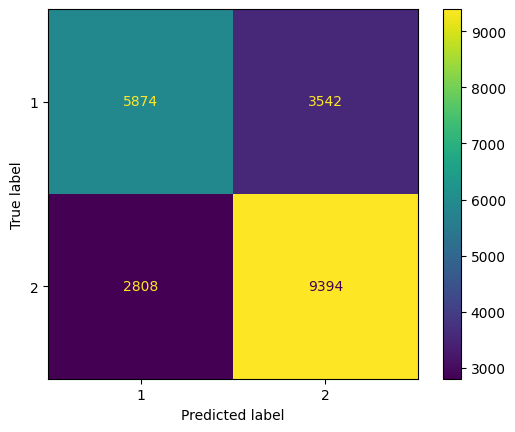

In [25]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train) 

y_pred = decision_tree.predict(X_test)

show_metrics(decision_tree, y_test, y_pred)

Random Forest

Accuracy score: 71%

              precision    recall  f1-score   support

           1       0.70      0.61      0.66      9416
           2       0.73      0.80      0.76     12202

    accuracy                           0.72     21618
   macro avg       0.72      0.71      0.71     21618
weighted avg       0.72      0.72      0.72     21618



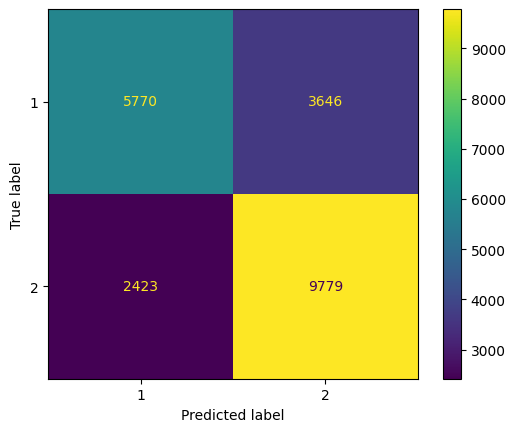

In [26]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=70)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

show_metrics(random_forest, y_test, y_pred)

Importancia de las features en Random Forest

In [27]:
importances = pd.DataFrame(
    {'feature':df.drop("high_risk", axis=1).columns,
     'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
AGE,0.423
INTUBED,0.277
PNEUMONIA,0.053
CLASIFFICATION_FINAL,0.030
HIPERTENSION,0.024
DIABETES,0.023
OBESITY,0.023
USMER,0.021
SEX,0.020


K-Nearest Neighbour

Accuracy score: 72%

              precision    recall  f1-score   support

           1       0.70      0.63      0.66      9416
           2       0.73      0.79      0.76     12202

    accuracy                           0.72     21618
   macro avg       0.72      0.71      0.71     21618
weighted avg       0.72      0.72      0.72     21618



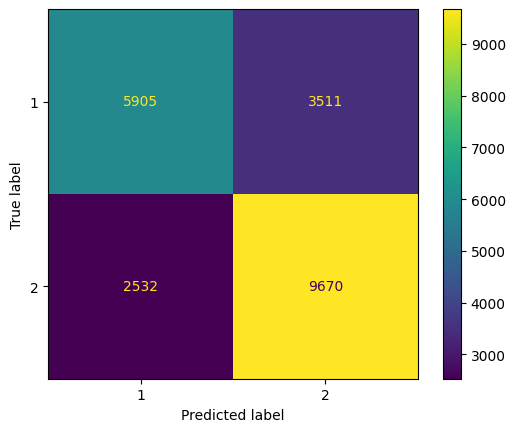

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 14) #Elegimos 14 para que no se caliente el ordenador
knn.fit(X_train, y_train)  

y_pred = knn.predict(X_test)  

show_metrics(knn, y_test, y_pred)

Obtener valor K

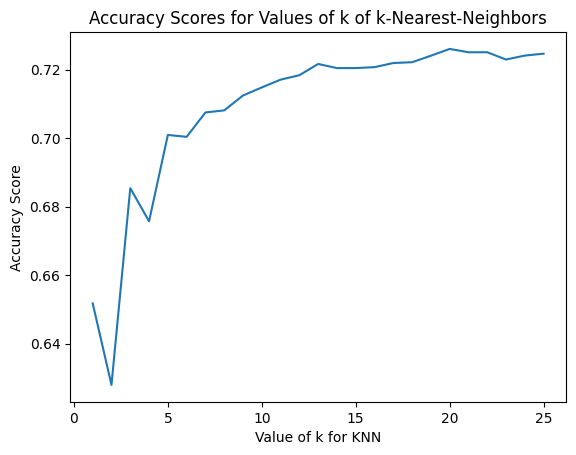

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()